### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Classificação de Padrões - MNIST database of handwritten digits </b>

<div style='text-align: justify;'>
As classes e funções apresentadas no bloco de código abaixo foram comuns a todos os classificadores implementados. Nelas, estão implementadas a leitura dos dados, adequação da codificação do vetor de saída (alvo) e normalização dos dados. A seguir, cada uma delas é melhor descrita:
</div>

- MNIST_data:<br>
    <div style='text-align: justify;'>
    
    Essa classe foi criada para conter as funções de aquisição dos dados de treino <b>get_train_data()</b> e dados de teste <b>get_test_data()</b>. Essas funções utilizam a biblioteca mnist (#https://pypi.org/project/python-mnist/#description), a qual, a partir dos dados obtidos em http://yann.lecun.org/exdb/mnist/index.html, descomprime e transforma-os em um objeto Numpy Array (np.array). Cada uma dessas funções retornam dois objetos np.array, um com os dados de entrada e o outro com seus respectivos labels. Os dados de entrada são retornados de forma vetorizada, ou seja, a matriz $28{\times}28$ é empilhada dando origem a um vetor $784{\times}1$. Os labels são o valor inteiro entre 0 e 9 que esse vetor representa.

    Cabe destacar que a base de dados de treino possuem 60.000 elementos e a de teste 10.000 elementos. Dessa forma, os dados de entrada formam uma matriz $60.000{\times}738$, para a base de treino, e $10.000{\times}738$, para a base de teste. Os labels, por sua vez, forma um vetor de $60.000{\times}1$, para a base de treino, e $10.000{\times}1$, para a base de teste</div>

    <div style='text-align: justify;' class="alert alert-block alert-info">
    
    Nota-se que cada elemento representa uma linha e suas características são ordenadas ao longo de suas colunas, o que diverge da ordenação empregada ao longo da disciplina. Optou-se por manter essa ordenação, assim, algumas operações matriciais podem apresentar uma ordem contrária à apresentada nas notas de aula, por exemplo:

    $\vec{y} = \tilde{W} \cdot \vec{x}$ (notas de aula)<br> 
    $\vec{y} = \vec{x} \cdot \tilde{W}$ (seguindo a notação adotada no trabalho)
    </div>


- one_hot_enconding():
    <div style='text-align: justify;'>
        
    Essa função altera o formato do vetor labels. Para cada elemento da base de dados de entrada do MNIST, seja a de treino ou de teste, existirá um label que representará o valor associado a esse elemento da base de dados. Tomando como exemplo os dados de treino, sua base de dados terá dimensão $60.000{\times}738$, visto que o procedimento de obtenção dos dados retorna esses dados de forma vetorizada. No caso dos seu respectivo vetor de label ($\vec{y}$), ele terá dimensão $60.000{\times}1$.

    Os possíveis valores de cada um dos elementos contidos no vetor de labels são representados por $x \in [0,9]$, tal que $x \in \Z$. A função aqui descrita, portanto, cria uma nova codificação para os labels baseada na codificação one-hot. Como $x$ pode assumir 10 valores (classes), cada elemento do vetor de labels dará origem a um vetor de cardinalidade igual 10. Portanto, após a aplicação dessa função, o vetor de label $\vec{y}$ passará a ter dimensão $60.000{\times}10$, para a base de treino, e $10.000{\times}10$, para a base de teste. 

    Esse vetor terá valor igual a 1 no índice que coincide com o valor representando no respectivo elemento do vetor de labels original, nos demais índices receberá o valor 0. Exemplificando, após a utilização da função one_hot_enconding(): <br>
    
    - $0 \rightarrow [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $1 \rightarrow [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $ \,\vdots \rightarrow \quad\quad\quad\quad\,\, \vdots$ <br>
    - $9 \rightarrow [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$ <br>
    
    A utilização dessa codificação é interessante, pois assume que os vetores que representam cada classe são ortogonais entre si, ou seja, mutuamente exclusivos. 
    </div>


- norm_data():
    <div style='text-align: justify;'>

    A MNIST *database of handwritten digits* consiste na representação matricial de imagens de caracteres cursivos. Nessa representação, utiliza-se matrizes quadradas de dimensão $28{\times}28$, ou seja, cada imagem contém 784 pixels. Em cada um desses pixels, representasse uma tonalidade de cinza, considerando uma escala em que zero é totalmente branco e 255 totalmente preto.

    Como supracitado, cada uma dessas matrizes de dados são vetorizadas nas presente analises, dando origem a um vetor de dimensão $1{\times}p$. Agrupando esses vetores em linhas, obtém-se a matriz de dados de dimensão $n{\times}p$ utilizada nesse trabalho, sendo $n$ o número de imagens disponibilizadas para treino ou teste e $p = 784$. 

    A função nomr_data() atua normalizando os valores da escala de tons de cinza associados aos pixels das imagens de caracteres cursivos. Em outras palavras, para cada $n$ elemento da matriz de dados, seja de treino ou de teste, essa função varia intervalo de variação dos valores de $[0,255]$ para $[0,1]$. O processo de normalização é amplamente recomendado para algoritmos de classificação baseado em aprendizado, pois dados de entrada com elevados valores, ou que suas variáveis apresentem grandes diferença na magnitude dos seus valores, podem prejudicar o processo de aprendizado. Para normalização desses dados, adotou-se a seguinte equação:

    $$
        x^{norm}_{j} = \frac{x_{j} - x^{max}_{j}}{x^{max}_{j} - x^{min}_{j}}
    $$
    </div>
    


    


<p style="page-break-after:always;"></p>

In [2]:
import time
import numpy as np
from mnist import MNIST #https://pypi.org/project/python-mnist/#description
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import namedtuple
import warnings
warnings.filterwarnings("ignore")

class MNIST_data():

    def __init__(self):
        pass
    
    def get_train_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_training()

        return (np.array(x), np.array(y))
    
    def get_test_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_testing()

        return (np.array(x), np.array(y))

def one_hot_enconding(y, n):

    y_enc = np.zeros((y.shape[0], n))
    for i in range(y.shape[0]):
        y_enc[i, y[i]] = 1

    return y_enc

def norm_data(df):
    df_std = np.zeros(df.shape)

    for i in range(df.shape[0]):
        # df_std[i,:] = (df[i,:] - df[i,:].mean())/(df[i,:].std(ddof = std_ddof))
        df_std[i,:] = (df[i,:] - df[i,:].min())/(df[i,:].max() - df[i,:].min())
    return df_std

##### Avaliando o posto das matrizes dos dados de treino (X) e dados de teste (X_test)

In [220]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
if np.linalg.matrix_rank(X) == min(X.shape):
    print("Dados de entrada (X) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X) - Matriz de Posto Incompleto\n")
if np.linalg.matrix_rank(X_test) == min(X_test.shape):
    print("Dados de entrada (X_test) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X_test) - Matriz de Posto Incompleto\n")


Dados de entrada (X) - Matriz de Posto Incompleto

Dados de entrada (X_test) - Matriz de Posto Incompleto



##### Classificador Linear de Mínimos Quadrados

In [3]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)
def LSM_Class(X, Y, X_test, Y_test, Nr):
    Nr = 5
    tx_ok = np.zeros(Nr)
    tic = time.perf_counter()
    for r in range(Nr):
        rand_index = np.random.permutation(X.shape[0])
        X = X[rand_index,:]
        Y = Y[rand_index,:]

        if X.shape[0] != X.shape[1]:
            W = np.linalg.lstsq(X,Y)[0]
        else:
            W = np.linalg.solve(X,Y)[0]


        Y_mod = np.dot(X_test, W)
        count_ok = 0

        for j in range(Y_mod.shape[0]):
            if Y_mod[j,:].argmax() == Y_test[j,:].argmax():
                count_ok += 1
        
        tx_ok[r] = count_ok/Y_mod.shape[0]
        print("Rodada {} - Taxa de Acerto = {:.2%}".format(r+1, tx_ok[r]))

    toc = time.perf_counter()
    
    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))
    

In [4]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

LSM_Class(X, Y, X_test, Y_test, 5)

Rodada 1 - Taxa de Acerto = 85.30%
Rodada 2 - Taxa de Acerto = 85.34%
Rodada 3 - Taxa de Acerto = 85.31%
Rodada 4 - Taxa de Acerto = 85.28%
Rodada 5 - Taxa de Acerto = 85.33%

Taxa de acerto Média = 85.31%
Taxa de erro Média = 14.69%
Melhor Taxa de Acerto = 85.34%
Pior Taxa de Acerto = 85.28%
Desv. Pad. Taxa de Acerto = 0.02%


'Tempo de Calibração e Validação para 5 rodadas = 25.28 segundos'

<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador linear baseado em uma rede neural de uma camada (*1-layer NN*), Perceptron Simples???, obteve uma taxa de erro de 12.00% com a base de dados de teste, considerando nenhum pré-processamento desses dados.

O Classificador Linear de Mínimos Quadrados (CLMQ), por sua vez, apresenta um desempenho similar, com uma taxa de erro média de 14.68%. O desempenho desse classificador foi considerado satisfatório e evidencia que esse problema de classificação pode ser resolvido satisfatoriamente por uma superfície de decisão linear, ou seja, um problema linearmente separável.

Destaca-se que a operação para determinação da matriz $\tilde{W}$ utilizou o método de eliminação de Gauss, não sendo necessário a inversão explícita de $\tilde{X}\tilde{X}^{T}$. Como apresentado, as matrizes de dados de entrada para treino e teste possuem posto incompleto, logo haveria problema nessa inversão explícita supracitada.

Destaca-se, também, que o método de eliminação de Gauss possui um menor custo de processamento, sendo eficiente para dados de alta dimensão, como os utilizados no presente trabalho.

<div>

<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>

***

##### Perceptron Logístico

In [5]:
def act_fun(u, fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

def PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type):
#Função que treina e valida a Perceptron Simples 
    tx_ok = np.empty((Nr))
    best_run = {"Acc": 0, "RMSE": 0, "W": 0}
    worst_run = {"Acc": 1, "RMSE": 0, "W": 0}
    RMSE_ep = np.empty(0)

    if fun_type == "tanh":
        #codificação da saída fica -1 e 1 para tangente hiperbólica
        Y[Y == 0] = -1
        Y_test[Y == 0] = -1

    tic = time.perf_counter()
    for r in range(Nr):
        #Não embaralhei a cada rodada, pois os dados de treino sempre serão X e Y
        #Assim, como não haverá split do conjunto em dados de treino e teste
        #Decidi embaralhar só dentro de cada época
        #Inicialização aleatória dos pesos
        ###Treino###
        W = np.random.rand(Y.shape[1], X.shape[1]+1)
        
        for ep in range(Ne):
            #Embaralhamento da matriz de dados saída
            rand_index = np.random.permutation(X.shape[0])
            X = X[rand_index, :]
            Y = Y[rand_index, :]
            RMSE = 0
            
            for i in range(X.shape[0]):
                x = np.append(-1, X[i,:]) #add bias
                U = np.dot(W, x)
                y = act_fun(U, fun_type)
                err = Y[i,:] - y

                x = np.expand_dims(x, 1)
                err = np.expand_dims(err, 1)

                RMSE = RMSE + 0.5*np.power(err, 2).sum()
                W = W + eta*np.dot(err, x.T)
            
            RMSE_ep = np.append(RMSE_ep, RMSE/X.shape[0])

        ###Validação###
        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W, x)
            y = act_fun(U, fun_type)

            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        tx_ok[r] = count/X_test.shape[0]

        if tx_ok[r] > best_run["Acc"]:
            best_run["Acc"], best_run["RMSE"], best_run["W"] = (tx_ok[r], RMSE_ep, W)


        if tx_ok[r] < worst_run["Acc"]:
            worst_run["Acc"], worst_run["RMSE"], worst_run["W"] = (tx_ok[r], RMSE_ep, W)
        
        print("Rodada {} - Taxa de acerto = {:.2%}".format(r+1, tx_ok[r]))
    toc = time.perf_counter()

    RMSE_ep = RMSE_ep.reshape((Nr,Ne))
    fig, ax = plt.subplots()
    for i in range(RMSE_ep.shape[0]):
        ax.plot(RMSE_ep[i,:], label = "Rodada {}".format(i+1))
    ax.legend()
    ax.set_ylabel("RMSE")
    ax.set_xlabel("epochs")

    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))

Rodada 1 - Taxa de acerto = 90.82%
Rodada 2 - Taxa de acerto = 91.35%
Rodada 3 - Taxa de acerto = 91.51%
Rodada 4 - Taxa de acerto = 91.62%
Rodada 5 - Taxa de acerto = 91.61%

Taxa de acerto Média = 91.38%
Taxa de erro Média = 8.62%
Melhor Taxa de Acerto = 91.62%
Pior Taxa de Acerto = 90.82%
Desv. Pad. Taxa de Acerto = 0.30%


'Tempo de Calibração e Validação para 5 rodadas = 403.03 segundos'

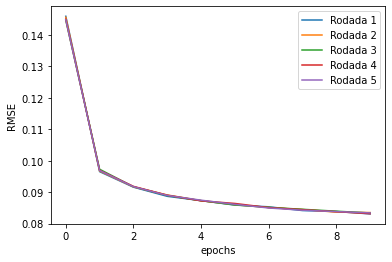

In [20]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
PS(X, Y, X_test, Y_test, 0.01, 5, 10, "log")

***

##### PCA

In [3]:
def PCA (x_train, x_test, compress, spt_point):
    #x dimensão pxn 
    #p número de variáveis de cada amostra e n número de amostras

    #Centralizando os dados
    x_train = x_train -  x_train.mean(axis = 1, keepdims = True) 
    x_test = x_test - x_test.mean(axis = 1, keepdims = True)
    
    cov_x = np.cov(x_train)

    u, l, v = np.linalg.svd(cov_x)

    ve = np.cumsum(l)/l.sum()

    if compress == True:

        sel_index = np.where(ve <= spt_point)
        v = v[:,sel_index[0]]

        fig, ax = plt.subplots()
        ax.plot(ve)
        ax.plot(ve[sel_index], c = "red", label = "Dados Selecionados")
        ax.set_ylabel("Variância Explicada Acumulada")
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
        ax.legend()

        z = np.dot(v.T, x_train)
        z_test = np.dot(v.T, x_test)
    else:
        z = np.dot(v.T, x_train)
        z_test = np.dot(v.T, x_test)
    #Transpor para que Z saia no formato utilizado nos códigos dos classificados
    #formato nxp, n número de amostras e p número de características
    return (z.T, z_test.T)


##### PCA + Classificador Linear de Mínimos Quadrados

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1 - Taxa de Acerto = 82.09%
Rodada 2 - Taxa de Acerto = 82.09%
Rodada 3 - Taxa de Acerto = 82.09%
Rodada 4 - Taxa de Acerto = 82.12%
Rodada 5 - Taxa de Acerto = 82.09%

Taxa de acerto Média = 82.10%
Taxa de erro Média = 17.90%
Melhor Taxa de Acerto = 82.12%
Pior Taxa de Acerto = 82.09%
Desv. Pad. Taxa de Acerto = 0.01%


'Tempo de Calibração e Validação para 5 rodadas = 5.12 segundos'

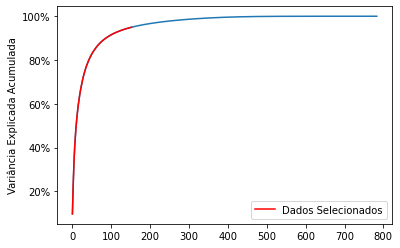

In [9]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()

Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

LSM_Class(X, Y, X_test, Y_test, 5)

##### PCA + Perceptron Logístico

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1 - Taxa de acerto = 88.23%
Rodada 2 - Taxa de acerto = 88.32%
Rodada 3 - Taxa de acerto = 88.34%
Rodada 4 - Taxa de acerto = 88.40%
Rodada 5 - Taxa de acerto = 88.41%

Taxa de acerto Média = 88.34%
Taxa de erro Média = 11.66%
Melhor Taxa de Acerto = 88.41%
Pior Taxa de Acerto = 88.23%
Desv. Pad. Taxa de Acerto = 0.06%


'Tempo de Calibração e Validação para 5 rodadas = 267.63 segundos'

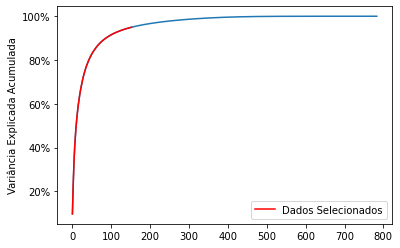

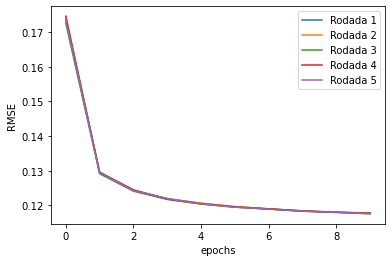

In [10]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
PS(X, Y, X_test, Y_test, 0.01, 5, 10, "log")

***

##### MLP

In [4]:
def act_fun(u, fun):
    action_fun = namedtuple("act_fun", ["f", "df"])
    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0
        du = np.nan
    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
        du = 0.5*(1-np.power(u,2)) + 0.05
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
        du = u*(1-u) + 0.05
    return (action_fun(f = u, df = du))

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def weight_matrix(dict_q):
    #Cria as matrizes de peso sinapticos
    #Mantendo a compatibilidade entre as dimensões de forma que viabiliza as operações matriciais

    W = {}
    for i in range(len(dict_q)):
        if i == 0:
        #camada oculta
            W[i] = np.random.rand(dict_q[i], X.shape[1] + 1)*0.01
        else:
        #Demais camadas, se houver
            W[i] = np.random.rand(dict_q[i], dict_q[i-1] + 1)*0.01
    return (W)
    
def MLP(X, Y, X_test, Y_test, eta, Nr, Ne, mon, fun_type):
    
    tx_ok = np.empty((Nr))
    RMSE_ep = np.empty(0)
    fun_type = "log"

    if fun_type == "tanh":
        #codificação da saída fica -1 e 1 para tangente hiperbólica
        Y[Y == 0] = -1
        Y_test[Y == 0] = -1

    #Arquitetura da MLP (p, q, c) - 1 Camada Ocula
    #p = entradas, q = neuronicos oculos, c = neuronios de saída
    #dict_q Número de neuronios em cada camada

    dict_q = {
        0: 86,
        1: Y.shape[1]
    }

    tic = time.perf_counter()
    for r in range(Nr):
        W = weight_matrix(dict_q)
        W_old = W.copy()

        for ep in range(Ne):
            rand_index = np.random.permutation(X.shape[0])
            X = X[rand_index,:]
            Y = Y[rand_index,:]
            RMSE = 0

            for i in range(X.shape[0]):
                x = np.append(-1, X[i,:])
                U1 = np.dot(W[0], x)
                z, dz = act_fun(U1, fun_type)

                z = np.append(-1, z)
                U2 = np.dot(W[1], z)
                y, dy = act_fun(U2, fun_type)

                err = Y[i,:] - y

                RMSE = RMSE + 0.5*np.power(err,2).sum()

                err = np.expand_dims(Hardamad_Prod(err, dy),  1)

                x = np.expand_dims(x,1)
                z = np.expand_dims(z,1)


                W[0] = W[0] + eta*np.dot(Hardamad_Prod(dz, np.dot(
                    W[1][:,1:].T, err)), x.T) + mon*(W[0] - W_old[0])
                
                W[1] = W[1] + eta*np.dot(err, z.T) + mon*(W[1] - W_old[1])

                W_old = W.copy()

            RMSE_ep = np.append(RMSE_ep, RMSE/X.shape[0])

        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U1 = np.dot(W[0], x)
            z = act_fun(U1, fun_type).f
            z = np.append(-1, z)
            U2 = np.dot(W[1], z)
            y = act_fun(U2, fun_type).f

            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        tx_ok[r] = count/X_test.shape[0]
        print("Rodada {} - Taxa de acerto = {:.2%}".format(r+1, tx_ok[r]))
    toc = time.perf_counter()

    RMSE_ep = RMSE_ep.reshape((Nr,Ne))
    fig, ax = plt.subplots()
    for i in range(RMSE_ep.shape[0]):
        ax.plot(RMSE_ep[i,:], label = "Rodada {}".format(i+1))
    ax.legend()
    ax.set_ylabel("RMSE")
    ax.set_xlabel("epochs")

    print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
    print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
    print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
    print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
    print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

    return("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))



Rodada 1 - Taxa de acerto = 96.31%
Rodada 2 - Taxa de acerto = 96.62%
Rodada 3 - Taxa de acerto = 96.34%
Rodada 4 - Taxa de acerto = 96.74%
Rodada 5 - Taxa de acerto = 96.51%

Taxa de acerto Média = 96.50%
Taxa de erro Média = 3.50%
Melhor Taxa de Acerto = 96.74%
Pior Taxa de Acerto = 96.31%
Desv. Pad. Taxa de Acerto = 0.16%


'Tempo de Calibração e Validação para 5 rodadas = 2007.28 segundos'

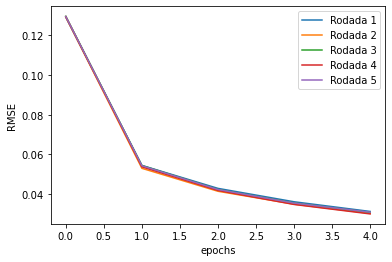

In [5]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

#LP(X, Y, X_test, Y_test, eta, Nr, Ne, mon, fun_type)
MLP (X, Y, X_test, Y_test, 0.05, 5, 5, 0.75, "log")

##### PCA + MLP

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)
Rodada 1 - Taxa de acerto = 87.08%
Rodada 2 - Taxa de acerto = 87.05%
Rodada 3 - Taxa de acerto = 87.13%
Rodada 4 - Taxa de acerto = 87.12%
Rodada 5 - Taxa de acerto = 87.27%

Taxa de acerto Média = 87.13%
Taxa de erro Média = 12.87%
Melhor Taxa de Acerto = 87.27%
Pior Taxa de Acerto = 87.05%
Desv. Pad. Taxa de Acerto = 0.08%


'Tempo de Calibração e Validação para 5 rodadas = 1522.55 segundos'

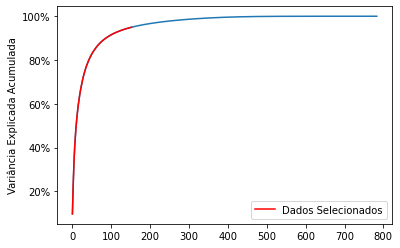

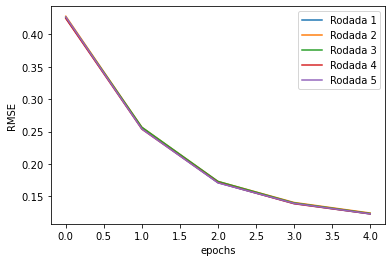

In [6]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#PS (X, Y, X_test, Y_test, eta, Nr, Ne, fun_type)
MLP (X, Y, X_test, Y_test, 0.01, 5, 5, 0.75, "log")


***

##### Ensemble (M = 25 Perceptrons Logísticos)

In [27]:
def act_fun(u, fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

def bagging_sampler(x, y):
    baggin_index = np.random.randint(0, x.shape[0], size = x.shape[0])

    x = x[baggin_index,:]
    y = y[baggin_index,:]

    return (x,y)

def initialize_weights(shape, Number_machine):
    W = {}
    for i in range(Number_machine):
        W[i] = np.random.rand(shape[0], shape[1])
    return W

Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1, Acerto do Ensemble 88.46%
Rodada 2, Acerto do Ensemble 88.37%
Rodada 3, Acerto do Ensemble 88.55%
Rodada 4, Acerto do Ensemble 88.47%
Rodada 5, Acerto do Ensemble 88.52%


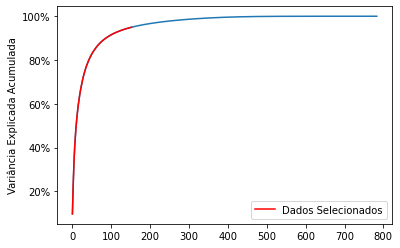

In [30]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

eta = 0.01
Ne = 10
Nr = 5
Nm = 25 #Número de Máquinas do Ensemble
fun_type = "log"
tx_ok = np.empty((Nr))
RMSE_ep = np.empty(0)

tic = time.perf_counter()
for r in range(Nr):
    count_m = np.full(Nm, np.nan) #contado para taxa de acerto de cada máquina
    W = initialize_weights(shape = (Y.shape[1], X.shape[1] + 1), Number_machine = Nm)

    for m in range(Nm):
        #X_m e Y_m são as entradas de cada um dos m integrantes do ensemble
        #A diversificação é feita através do Bagging, amostrador com repetição
        X_m, Y_m = bagging_sampler(X, Y)

        for e in range(Ne):
            #Embaralhamento para cada época
            rand_index = np.random.permutation(X_m.shape[0])
            X_m = X_m[rand_index,:]
            Y_m = Y_m[rand_index,:]
            RMSE = 0
            for i in range(X_m.shape[0]):
                x = np.append(-1, X_m[i,:])
                U = np.dot(W[m], x)
                y = act_fun(U, fun_type)
                err = Y_m[i,:] - y

                x = np.expand_dims(x,1)
                err = np.expand_dims(err, 1)

                RMSE = RMSE + 0.5*np.power(err,2).sum()
                #Atualiza os pesos da m-ésimo integrante do ensemble
                W[m] = W[m] + eta*np.dot(err, x.T)
        #Cálculo dos pesos para cada integrante do ensemble
        #Os integrantes do ensemble serão agregados através de uma média ponderada
        #A ponderação será dada pela taxa de acerto de cada integrante, calculada abaixo
        count = 0
        for j in range(X_test.shape[0]):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W[m], x)
            y = act_fun(U, fun_type)
            if Y_test[j,:].argmax() == y.argmax():
                count += 1

        count_m[m] = count/X_test.shape[0]
    
    count_ensemble = 0
    for j in range(X_test.shape[0]):
        num = 0
        for m in range(Nm):
            x = np.append(-1, X_test[j,:])
            U = np.dot(W[m], x)
            y = act_fun(U, fun_type)
            num = num + y*count_m[m]
            #num acumula o produto da saída por sua taxa de acerto
        y_m = num/count_m.sum()
        #y_m é a saída ponderada de cada integrante do ensemble
        if Y_test[j,:].argmax() == y_m.argmax():
            count_ensemble += 1
    print ("Rodada {}, Acerto do Ensemble = {:.2%}".format(r+1, count_ensemble/X_test.shape[0]))
    
toc = time.perf_counter()

print("Tempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))



***

##### Ensemble (M = 25 MLPs)
Tendo em vista o tempo necessário para treinamento das MLPs acima apresentadas, optou-se pela utilização da biblioteca scikit-learn para realização do ensemble de 25 MLPs por ela ter um processamento mais otimizado.

***

##### Classificador Adicinal (Extreme Learning Machine - ELM) + PCA


Dimensão da matriz de dados de treino antes do PCA: (60000, 784)
Dimensão da matriz de dados de teste antes do PCA: (10000, 784)
Dimensão da matriz de dados de treino após PCA (95% da variância): (60000, 153)
Dimensão da matriz de dados de teste após PCA (95% da variância): (10000, 153)

Rodada 1, Taxa de acerto 80.55%
Rodada 2, Taxa de acerto 80.55%
Rodada 3, Taxa de acerto 80.55%
Rodada 4, Taxa de acerto 80.55%
Rodada 5, Taxa de acerto 80.55%

Taxa de acerto Média = 80.55%
Taxa de erro Média = 19.45%
Melhor Taxa de Acerto = 80.55%
Pior Taxa de Acerto = 80.55%
Desv. Pad. Taxa de Acerto = 0.00%

Tempo de Calibração e Validação para 5 rodadas = 186.7 segundos


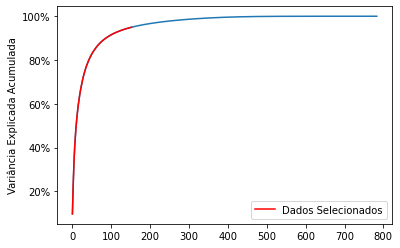

In [51]:
def act_fun(u,fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

print("Dimensão da matriz de dados de treino antes do PCA: {}".format(X.shape))
print("Dimensão da matriz de dados de teste antes do PCA: {}".format(X_test.shape))
#A base de dados do MNIST é disponibilizada no seguinte padrão nxp
#n é o número de amostras, p o número de característica
#Para aplicação do PCA, deve-se transpor essa matriz para que se torne pxn

X, X_test = PCA(X.T, X_test.T, compress = True, spt_point = 0.95)
print("Dimensão da matriz de dados de treino após PCA (95% da variância): {}".format(X.shape))
print("Dimensão da matriz de dados de teste após PCA (95% da variância): {}\n".format(X_test.shape))

#Transpondo para aproveitar uma implementação desenvolvida durante as aulas da disciplina
X, Y = (X.T, Y.T)
X_test, Y_test = (X_test.T, Y_test.T)

fun_type = "log"

Nr = 5
q = 86
tx_ok = np.empty(Nr)
W = np.random.normal(loc = 0, scale = 0.1, size = (q, X.shape[0]+1))

tic = time.perf_counter()
for r in range(Nr):

    rand_index = np.random.permutation(X.shape[1])

    X = X[:,rand_index]
    Y = Y[:,rand_index]

    Z = []

    for i in range(X.shape[1]):
        x = np.append(-1, X[:,i])
        U1 = np.dot(W, x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        Z.append(z)

    Z = np.array(Z)
    
    tic2 = time.perf_counter()
    
    M = np.dot(Y, np.linalg.pinv(Z.T))
    
    count = 0

    for j in range(X_test.shape[1]):
        x = np.append(-1, X_test[:,j])
        U1 = np.dot(W,x)
        z = act_fun(U1, fun_type)
        z = np.append(-1, z)
        y = np.dot(M, z)

        if Y_test[:,j].argmax() == y.argmax():
            count += 1
    tx_ok[r] = count/X_test.shape[1]
    print("Rodada {}, Taxa de acerto {:.2%}".format(r+1, count/X_test.shape[1]))
toc = time.perf_counter()

print("\nTaxa de acerto Média = {:.2%}".format(tx_ok.mean()))
print("Taxa de erro Média = {:.2%}".format(1-tx_ok.mean()))
print("Melhor Taxa de Acerto = {:.2%}".format(tx_ok.max()))
print("Pior Taxa de Acerto = {:.2%}".format(tx_ok.min()))
print("Desv. Pad. Taxa de Acerto = {:.2%}".format(tx_ok.std()))

print("\nTempo de Calibração e Validação para {} rodadas = {} segundos".format(Nr, round(toc-tic, 2)))

<div class="alert alert-block alert-warning">
S2
</div>

<div class="alert alert-block alert-info">
S2
</div>

<div class="alert alert-block alert-success">
S2
</div>

<div class="alert alert-block alert-danger">
S2
</div>